In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load datasets
def load_and_prepare(filepath):
    df = pd.read_csv(filepath, header=None)
    df = df[[1, 2]]  # [label, text]
    df.columns = ['label', 'text']

    # Drop NaNs
    df = df.dropna(subset=['text', 'label'])

    # Map multi-class to binary: 0 = fake, 1 = real
    fake_labels = ['false', 'pants-fire', 'barely-true']
    df['label'] = df['label'].apply(lambda x: 0 if x in fake_labels else 1)

    return df

train_df = load_and_prepare("train.csv")
valid_df = load_and_prepare("valid.csv")
test_df = load_and_prepare("test.csv")

# Combine train + valid for training
combined_df = pd.concat([train_df, valid_df])

# Text preprocessing (optional: add your own cleaning here)
combined_df['cleaned_text'] = combined_df['text']
test_df['cleaned_text'] = test_df['text']

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train = vectorizer.fit_transform(combined_df['cleaned_text'])
y_train = combined_df['label']

X_test = vectorizer.transform(test_df['cleaned_text'])
y_test = test_df['label']

# Train Logistic Regression
lr_model = LogisticRegression(class_weight='balanced')
lr_model.fit(X_train, y_train)

# Predict
y_pred = lr_model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6559
Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.48      0.40       304
           1       0.81      0.71      0.76       963

    accuracy                           0.66      1267
   macro avg       0.58      0.59      0.58      1267
weighted avg       0.70      0.66      0.67      1267



In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
import warnings

# Optional: XGBoost (install if not available)
try:
    from xgboost import XGBClassifier
    xgb_installed = True
except ImportError:
    xgb_installed = False
    warnings.warn("XGBoost not installed. Skipping XGBoost model.")

# Load and prepare function
def load_and_prepare(filepath):
    df = pd.read_csv(filepath, header=None)
    df = df[[1, 2]]
    df.columns = ['label', 'text']
    df = df.dropna(subset=['text', 'label'])
    fake_labels = ['false', 'pants-fire', 'barely-true']
    df['label'] = df['label'].apply(lambda x: 0 if x in fake_labels else 1)
    return df

# Load data
train_df = load_and_prepare("train.csv")
valid_df = load_and_prepare("valid.csv")
test_df = load_and_prepare("test.csv")

# Combine train + valid
combined_df = pd.concat([train_df, valid_df])
combined_df['cleaned_text'] = combined_df['text']
test_df['cleaned_text'] = test_df['text']

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train = vectorizer.fit_transform(combined_df['cleaned_text'])
y_train = combined_df['label']
X_test = vectorizer.transform(test_df['cleaned_text'])
y_test = test_df['label']

# Define models
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight='balanced'),
    "SVM (Linear)": LinearSVC(class_weight='balanced', max_iter=2000),
}

if xgb_installed:
    models["XGBoost"] = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train and evaluate
for name, model in models.items():
    print(f"\n🔍 Evaluating: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))



🔍 Evaluating: Logistic Regression
Accuracy: 0.6559
Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.48      0.40       304
           1       0.81      0.71      0.76       963

    accuracy                           0.66      1267
   macro avg       0.58      0.59      0.58      1267
weighted avg       0.70      0.66      0.67      1267


🔍 Evaluating: Naive Bayes
Accuracy: 0.7601
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.00      0.01       304
           1       0.76      1.00      0.86       963

    accuracy                           0.76      1267
   macro avg       0.63      0.50      0.44      1267
weighted avg       0.70      0.76      0.66      1267


🔍 Evaluating: Random Forest
Accuracy: 0.7632
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.06      0.11       304
           1       0.77

c:\Users\tamra\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Accuracy: 0.7593
Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.05      0.08       304
           1       0.77      0.98      0.86       963

    accuracy                           0.76      1267
   macro avg       0.62      0.52      0.47      1267
weighted avg       0.70      0.76      0.67      1267



In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load and prepare function
def load_and_prepare(filepath):
    df = pd.read_csv(filepath, header=None)
    df = df[[1, 2]]
    df.columns = ['label', 'text']
    df = df.dropna(subset=['text', 'label'])

    # Binary label mapping
    fake_labels = ['false', 'pants-fire', 'barely-true']
    df['label'] = df['label'].apply(lambda x: 0 if x in fake_labels else 1)

    return df

# Load datasets
train_df = load_and_prepare("train.csv")
valid_df = load_and_prepare("valid.csv")
test_df = load_and_prepare("test.csv")

# Combine train and valid
combined_df = pd.concat([train_df, valid_df])

# Tokenization
MAX_NUM_WORDS = 10000
MAX_SEQUENCE_LENGTH = 100

tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(combined_df['text'])

X_train = tokenizer.texts_to_sequences(combined_df['text'])
X_test = tokenizer.texts_to_sequences(test_df['text'])

X_train_padded = pad_sequences(X_train, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')

y_train = combined_df['label'].values
y_test = test_df['label'].values

# --------------------- LSTM Model ---------------------
print("\n🔁 Training LSTM Model")

lstm_model = Sequential([
    Embedding(MAX_NUM_WORDS, 64, input_length=MAX_SEQUENCE_LENGTH),
    LSTM(64),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

lstm_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-3), metrics=['accuracy'])
lstm_model.summary()

lstm_model.fit(X_train_padded, y_train, epochs=5, batch_size=64, validation_split=0.1, verbose=2)

# Evaluate
y_pred_lstm = (lstm_model.predict(X_test_padded) > 0.5).astype("int32")
print("\n🧾 LSTM Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_lstm))
print("Classification Report:\n", classification_report(y_test, y_pred_lstm))

# --------------------- BiLSTM Model ---------------------
print("\n🔁 Training BiLSTM Model")

bilstm_model = Sequential([
    Embedding(MAX_NUM_WORDS, 64, input_length=MAX_SEQUENCE_LENGTH),
    Bidirectional(LSTM(64)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

bilstm_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-3), metrics=['accuracy'])
bilstm_model.summary()

bilstm_model.fit(X_train_padded, y_train, epochs=5, batch_size=64, validation_split=0.1, verbose=2)

# Evaluate
y_pred_bilstm = (bilstm_model.predict(X_test_padded) > 0.5).astype("int32")
print("\n🧾 BiLSTM Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_bilstm))
print("Classification Report:\n", classification_report(y_test, y_pred_bilstm))




🔁 Training LSTM Model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 64)           640000    
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 673089 (2.57 MB)
Trainable params: 673089 (2.57 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5


163/163 - 7s - loss: 0.5640 - accuracy: 0.7541 - val_loss: 0.5891 - val_accuracy: 0.7268 - 7s/epoch - 41ms/step
Epo

c:\Users\tamra\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tamra\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tamra\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 64)           640000    
                                                                 
 bidirectional (Bidirection  (None, 128)               66048     
 al)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 706177 (2.69 MB)
Trainable params: 706177 (2.69 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
163/163 - 9s - loss: 0.5549 - accuracy: 0.7556 - val_loss: 0.5823 - val_ac

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

def train_and_evaluate(model_type="lstm", param_grid={}):
    best_model = None
    best_accuracy = 0
    best_params = {}

    for embed_dim in param_grid['embedding_dim']:
        for lstm_units in param_grid['lstm_units']:
            for dropout in param_grid['dropout']:
                for lr in param_grid['learning_rate']:
                    for batch in param_grid['batch_size']:
                        print(f"\n🔍 Training {model_type.upper()} | Embed: {embed_dim}, Units: {lstm_units}, Dropout: {dropout}, LR: {lr}, Batch: {batch}")

                        model = Sequential()
                        model.add(Embedding(MAX_NUM_WORDS, embed_dim, input_length=MAX_SEQUENCE_LENGTH))

                        if model_type == "bilstm":
                            model.add(Bidirectional(LSTM(lstm_units)))
                        else:
                            model.add(LSTM(lstm_units))

                        model.add(Dropout(dropout))
                        model.add(Dense(1, activation='sigmoid'))

                        model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=lr), metrics=['accuracy'])

                        history = model.fit(
                            X_train_padded, y_train,
                            validation_split=0.1,
                            epochs=5,
                            batch_size=batch,
                            verbose=0,
                            callbacks=[EarlyStopping(patience=2, restore_best_weights=True)]
                        )

                        y_pred = (model.predict(X_test_padded) > 0.5).astype("int32")
                        acc = accuracy_score(y_test, y_pred)

                        print(f"🔹 Accuracy: {acc:.4f}")

                        if acc > best_accuracy:
                            best_accuracy = acc
                            best_model = model
                            best_params = {
                                'embedding_dim': embed_dim,
                                'lstm_units': lstm_units,
                                'dropout': dropout,
                                'learning_rate': lr,
                                'batch_size': batch
                            }

    print(f"\n🏆 Best {model_type.upper()} Accuracy: {best_accuracy:.4f}")
    print("Best Params:", best_params)
    return best_model, best_params, best_accuracy


# Hyperparameter options
param_grid = {
    'embedding_dim': [64, 128],
    'lstm_units': [64, 128],
    'dropout': [0.3, 0.5],
    'learning_rate': [1e-3, 5e-4],
    'batch_size': [32, 64]
}

# Run tuning
best_lstm_model, lstm_params, lstm_acc = train_and_evaluate("lstm", param_grid)
best_bilstm_model, bilstm_params, bilstm_acc = train_and_evaluate("bilstm", param_grid)


In [4]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

def train_and_evaluate(model_type="lstm", param_grid={}):
    best_model = None
    best_accuracy = 0
    best_params = {}

    for embed_dim in param_grid['embedding_dim']:
        for lstm_units in param_grid['lstm_units']:
            for dropout in param_grid['dropout']:
                for lr in param_grid['learning_rate']:
                    for batch in param_grid['batch_size']:
                        print(f"\n🔍 Training {model_type.upper()} | Embed: {embed_dim}, Units: {lstm_units}, Dropout: {dropout}, LR: {lr}, Batch: {batch}")

                        model = Sequential()
                        model.add(Embedding(MAX_NUM_WORDS, embed_dim, input_length=MAX_SEQUENCE_LENGTH))

                        if model_type == "bilstm":
                            model.add(Bidirectional(LSTM(lstm_units)))
                        else:
                            model.add(LSTM(lstm_units))

                        model.add(Dropout(dropout))
                        model.add(Dense(1, activation='sigmoid'))

                        model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=lr), metrics=['accuracy'])

                        history = model.fit(
                            X_train_padded, y_train,
                            validation_split=0.1,
                            epochs=5,
                            batch_size=batch,
                            verbose=0,
                            callbacks=[EarlyStopping(patience=2, restore_best_weights=True)]
                        )

                        y_pred = (model.predict(X_test_padded) > 0.5).astype("int32")
                        acc = accuracy_score(y_test, y_pred)

                        print(f"🔹 Accuracy: {acc:.4f}")

                        if acc > best_accuracy:
                            best_accuracy = acc
                            best_model = model
                            best_params = {
                                'embedding_dim': embed_dim,
                                'lstm_units': lstm_units,
                                'dropout': dropout,
                                'learning_rate': lr,
                                'batch_size': batch
                            }

    print(f"\n🏆 Best {model_type.upper()} Accuracy: {best_accuracy:.4f}")
    print("Best Params:", best_params)
    return best_model, best_params, best_accuracy


# Hyperparameter options
param_grid = {
    'embedding_dim': [64, 128],
    'lstm_units': [64, 128],
    'dropout': [0.3, 0.5],
    'learning_rate': [1e-3, 5e-4],
    'batch_size': [32, 64]
}

# Run tuning
best_lstm_model, lstm_params, lstm_acc = train_and_evaluate("lstm", param_grid)
best_bilstm_model, bilstm_params, bilstm_acc = train_and_evaluate("bilstm", param_grid)



🔍 Training LSTM | Embed: 64, Units: 64, Dropout: 0.3, LR: 0.001, Batch: 32
40/40 [==============================] - 1s 9ms/step
🔹 Accuracy: 0.7601

🔍 Training LSTM | Embed: 64, Units: 64, Dropout: 0.3, LR: 0.001, Batch: 64
40/40 [==============================] - 1s 9ms/step
🔹 Accuracy: 0.7601

🔍 Training LSTM | Embed: 64, Units: 64, Dropout: 0.3, LR: 0.0005, Batch: 32
40/40 [==============================] - 1s 14ms/step
🔹 Accuracy: 0.7601

🔍 Training LSTM | Embed: 64, Units: 64, Dropout: 0.3, LR: 0.0005, Batch: 64
40/40 [==============================] - 1s 16ms/step
🔹 Accuracy: 0.7601

🔍 Training LSTM | Embed: 64, Units: 64, Dropout: 0.5, LR: 0.001, Batch: 32
40/40 [==============================] - 1s 14ms/step
🔹 Accuracy: 0.7601

🔍 Training LSTM | Embed: 64, Units: 64, Dropout: 0.5, LR: 0.001, Batch: 64
40/40 [==============================] - 1s 8ms/step
🔹 Accuracy: 0.7601

🔍 Training LSTM | Embed: 64, Units: 64, Dropout: 0.5, LR: 0.0005, Batch: 32
40/40 [=======================

40/40 [==============================] - 1s 14ms/step


C:\Users\tamra\AppData\Local\Temp\ipykernel_10908\601917716.py:52: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
c:\Users\tamra\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


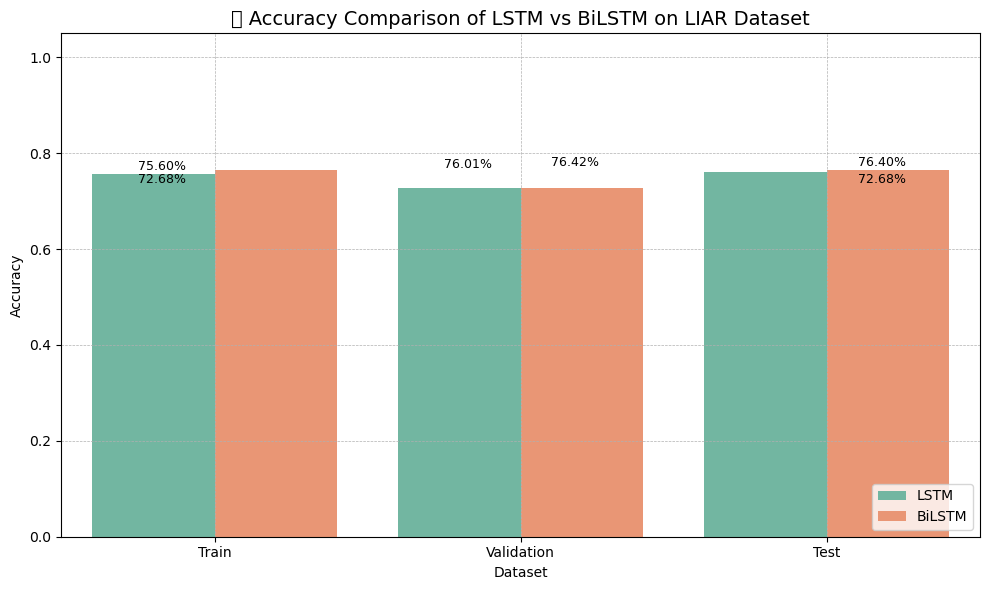

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

def evaluate_model_on_sets(model, X_train, y_train, X_val, y_val, X_test, y_test, model_name="Model"):
    train_preds = (model.predict(X_train) > 0.5).astype("int32")
    val_preds = (model.predict(X_val) > 0.5).astype("int32")
    test_preds = (model.predict(X_test) > 0.5).astype("int32")

    train_acc = accuracy_score(y_train, train_preds)
    val_acc = accuracy_score(y_val, val_preds)
    test_acc = accuracy_score(y_test, test_preds)

    return {
        "Train": train_acc,
        "Validation": val_acc,
        "Test": test_acc,
        "Model": model_name
    }

# Create validation split index
val_split = 0.1
val_start = int((1 - val_split) * X_train_padded.shape[0])

# Split train and validation
X_train_final = X_train_padded[:val_start]
y_train_final = y_train[:val_start]

X_val_final = X_train_padded[val_start:]
y_val_final = y_train[val_start:]

# Evaluate LSTM
lstm_results = evaluate_model_on_sets(best_lstm_model, X_train_final, y_train_final, X_val_final, y_val_final, X_test_padded, y_test, "LSTM")

# Evaluate BiLSTM
bilstm_results = evaluate_model_on_sets(best_bilstm_model, X_train_final, y_train_final, X_val_final, y_val_final, X_test_padded, y_test, "BiLSTM")

# Combine results into DataFrame for plotting
results_df = pd.DataFrame([lstm_results, bilstm_results])
results_df = results_df.set_index("Model").T.reset_index().rename(columns={"index": "Dataset"})

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df.melt(id_vars="Dataset", var_name="Model", value_name="Accuracy"), x="Dataset", y="Accuracy", hue="Model", palette="Set2")
plt.title("📊 Accuracy Comparison of LSTM vs BiLSTM on LIAR Dataset", fontsize=14)
plt.ylim(0, 1.05)
plt.ylabel("Accuracy")
plt.xlabel("Dataset")
for i, row in results_df.melt(id_vars="Dataset").iterrows():
    plt.text(i // 2 + (0.1 if row["Model"] == "BiLSTM" else -0.25), row["value"] + 0.01, f"{row['value']:.2%}", fontsize=9)
plt.legend(loc='lower right')
plt.tight_layout()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()


In [6]:
# =============================================================================
# 1) INSTALL DEPENDENCIES (run once)
# =============================================================================
!pip install tensorflow pandas scikit-learn matplotlib scikit-fuzzy

# =============================================================================
# 2) IMPORTS
# =============================================================================
import os, zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import skfuzzy as fuzz

# =============================================================================
# 3) LOAD & PREPROCESS LIAR DATA
# =============================================================================
# 3.1 Define LIAR column names
columns = [
    'id','label','statement','subject','speaker','job_title',
    'state','party','barely_true_counts','false_counts','half_true_counts',
    'mostly_true_counts','pants_on_fire_counts','context'
]

# 3.2 Read CSVs (tab-separated, no header)
train_df = pd.read_csv("train.csv", sep='\t', names=columns, header=None)
val_df   = pd.read_csv("valid.csv", sep='\t', names=columns, header=None)
test_df  = pd.read_csv("test.csv",  sep='\t', names=columns, header=None)

# 3.3 Binary-ify labels: {true,mostly-true,half-true} → 1 else 0
def simplify_label(x):
    try:
        return 1 if x.lower() in ('true','mostly-true','half-true') else 0
    except:
        return 0

for df in (train_df, val_df, test_df):
    df['label'] = df['label'].apply(simplify_label)
    # keep only what we need
    df.drop(columns=[c for c in df.columns if c not in ('label','statement')], inplace=True)

# 3.4 Inspect
print("Train label distribution:\n", train_df['label'].value_counts(), "\n")

# =============================================================================
# 4) TOKENIZE & PAD
# =============================================================================
all_text = pd.concat([train_df.statement, val_df.statement, test_df.statement])
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(all_text)

maxlen = 50
def seq_pad(df):
    seq = tokenizer.texts_to_sequences(df.statement)
    return pad_sequences(seq, maxlen=maxlen, padding='post', truncating='post')

X_train = seq_pad(train_df)
X_val   = seq_pad(val_df)
X_test  = seq_pad(test_df)

y_train = train_df.label.values
y_val   = val_df.label.values
y_test  = test_df.label.values

# =============================================================================
# 5) LOAD GloVe EMBEDDINGS
# =============================================================================
# Download & unzip if not already present
if not os.path.exists("glove.6B.100d.txt"):
    !wget http://nlp.stanford.edu/data/glove.6B.zip -q
    with zipfile.ZipFile("glove.6B.zip","r") as z: z.extract("glove.6B.100d.txt")

# Build embedding index
emb_index = {}
with open("glove.6B.100d.txt", encoding="utf8") as f:
    for line in f:
        parts = line.split()
        word, coefs = parts[0], np.asarray(parts[1:],dtype='float32')
        emb_index[word] = coefs

vocab_size = min(10000, len(tokenizer.word_index)+1)
embedding_dim = 100
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word,i in tokenizer.word_index.items():
    if i>=vocab_size: continue
    vec = emb_index.get(word)
    if vec is not None: embedding_matrix[i] = vec

# =============================================================================
# 6) BUILD Bi-LSTM MODEL
# =============================================================================
model = Sequential([
    Embedding(vocab_size, embedding_dim, weights=[embedding_matrix],
              input_length=maxlen, trainable=False),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# =============================================================================
# 7) TRAIN with callbacks
# =============================================================================
es = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
rlp = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val,y_val),
    epochs=10, batch_size=64,
    callbacks=[es, rlp]
)

# Optional: plot training curves
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend(); plt.title("Accuracy"); plt.show()

# =============================================================================
# 8) BASELINE EVALUATION
# =============================================================================
probs = model.predict(X_test).ravel()
y_pred_base = (probs>=0.5).astype(int)
print("\n-- BiLSTM Baseline --")
print(classification_report(y_test, y_pred_base))

# =============================================================================
# 9) EXTRACT FEATURES & FUZZY C-MEANS REFINEMENT
# =============================================================================
# 9.1 Extract last dense-64 features
feat_extractor = Model(inputs=model.input,
                       outputs=model.layers[-3].output)  # Dense(64) output
X_feats = feat_extractor.predict(X_test)

# 9.2 Normalize
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_feats).T  # transpose for cmeans

# 9.3 Fuzzy C-means
cntr, u, *_ = fuzz.cluster.cmeans(
    X_norm, c=2, m=2, error=0.005, maxiter=1000
)
fcm_labels = np.argmax(u, axis=0)

# 9.4 Align cluster IDs to “real” class via majority vote
from scipy.stats import mode
real_cluster = mode(fcm_labels[y_pred_base==1])[0][0]
y_pred_fcm = (fcm_labels==real_cluster).astype(int)

# =============================================================================
# 10) FINAL EVALUATION
# =============================================================================
print("\n-- After FCM Refinement --")
print(classification_report(y_test, y_pred_fcm))
print(f"Baseline Acc: {accuracy_score(y_test,y_pred_base):.4f}")
print(f"Refined Acc : {accuracy_score(y_test,y_pred_fcm):.4f}")



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Train label distribution:
 label
0    10249
1       20
Name: count, dtype: int64 



AttributeError: 'float' object has no attribute 'lower'

In [7]:
# =============================================================================
# 1) INSTALL DEPENDENCIES (run once)
# =============================================================================
!pip install tensorflow pandas scikit-learn matplotlib scikit-fuzzy

# =============================================================================
# 2) IMPORTS
# =============================================================================
import os, zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import skfuzzy as fuzz
from scipy.stats import mode

# =============================================================================
# 3) LOAD & PREPROCESS LIAR DATA
# =============================================================================
# 3.1 Column names for the LIAR dataset
columns = [
    'id','label','statement','subject','speaker','job_title',
    'state','party','barely_true_counts','false_counts','half_true_counts',
    'mostly_true_counts','pants_on_fire_counts','context'
]

# 3.2 Load CSVs (tab-separated, no header)
train_df = pd.read_csv("train.csv", sep='\t', names=columns, header=None)
val_df   = pd.read_csv("valid.csv", sep='\t', names=columns, header=None)
test_df  = pd.read_csv("test.csv",  sep='\t', names=columns, header=None)

# 3.3 Convert multiclass labels → binary
def simplify_label(x):
    try:
        return 1 if x.lower() in ('true','mostly-true','half-true') else 0
    except:
        return 0

for df in (train_df, val_df, test_df):
    df['label'] = df['label'].apply(simplify_label)
    # keep only what we need
    df.drop(columns=[c for c in df.columns if c not in ('label','statement')],
            inplace=True)

# 3.4 CLEAN STATEMENTS: fill NaN and force string type
for df in (train_df, val_df, test_df):
    df['statement'] = df['statement'].fillna('').astype(str)

# 3.5 Quick check
print("Train label counts:\n", train_df['label'].value_counts(), "\n")
print("Sample statements:\n", train_df['statement'].head(), "\n")

# =============================================================================
# 4) TOKENIZE & PAD
# =============================================================================
all_text = pd.concat([train_df.statement, val_df.statement, test_df.statement])

tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(all_text)

maxlen = 50
def seq_pad(df):
    seq = tokenizer.texts_to_sequences(df.statement)
    return pad_sequences(seq, maxlen=maxlen, padding='post', truncating='post')

X_train = seq_pad(train_df)
X_val   = seq_pad(val_df)
X_test  = seq_pad(test_df)

y_train = train_df.label.values
y_val   = val_df.label.values
y_test  = test_df.label.values

# =============================================================================
# 5) LOAD GloVe EMBEDDINGS
# =============================================================================
if not os.path.exists("glove.6B.100d.txt"):
    !wget http://nlp.stanford.edu/data/glove.6B.zip -q
    with zipfile.ZipFile("glove.6B.zip","r") as z:
        z.extract("glove.6B.100d.txt")

emb_index = {}
with open("glove.6B.100d.txt", encoding="utf8") as f:
    for line in f:
        parts = line.split()
        emb_index[parts[0]] = np.asarray(parts[1:], dtype='float32')

vocab_size = min(10000, len(tokenizer.word_index) + 1)
embedding_dim = 100
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    if i >= vocab_size: continue
    vec = emb_index.get(word)
    if vec is not None:
        embedding_matrix[i] = vec

# =============================================================================
# 6) BUILD Bi-LSTM MODEL
# =============================================================================
model = Sequential([
    Embedding(vocab_size, embedding_dim, weights=[embedding_matrix],
              input_length=maxlen, trainable=False),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# =============================================================================
# 7) TRAIN with callbacks
# =============================================================================
es  = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
rlp = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10, batch_size=64,
    callbacks=[es, rlp]
)

# Plot accuracy curve
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend(); plt.title("Accuracy"); plt.show()

# =============================================================================
# 8) BASELINE EVALUATION
# =============================================================================
probs        = model.predict(X_test).ravel()
y_pred_base  = (probs >= 0.5).astype(int)
print("\n-- BiLSTM Baseline --")
print(classification_report(y_test, y_pred_base))

# =============================================================================
# 9) FEATURE EXTRACTION + FUZZY C-MEANS REFINEMENT
# =============================================================================
# Extract the Dense(64) features
feat_extractor = Model(inputs=model.input, outputs=model.layers[-3].output)
X_feats        = feat_extractor.predict(X_test)

# Normalize & transpose for cmeans
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_feats).T

# Fuzzy C-Means
cntr, u, *_ = fuzz.cluster.cmeans(X_norm, c=2, m=2, error=0.005, maxiter=1000)
fcm_labels = np.argmax(u, axis=0)

# Align cluster→“real” via majority vote on Bi-LSTM positives
real_cluster = mode(fcm_labels[y_pred_base == 1])[0][0]
y_pred_fcm   = (fcm_labels == real_cluster).astype(int)

# =============================================================================
# 10) FINAL EVALUATION
# =============================================================================
print("\n-- After FCM Refinement --")
print(classification_report(y_test, y_pred_fcm))
print(f"Baseline Acc: {accuracy_score(y_test,y_pred_base):.4f}")
print(f"Refined Acc : {accuracy_score(y_test,y_pred_fcm):.4f}")


Train label counts:
 label
0    10249
1       20
Name: count, dtype: int64 

Sample statements:
 0    
1    
2    
3    
4    
Name: statement, dtype: object 




[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
'wget' is not recognized as an internal or external command,
operable program or batch file.


FileNotFoundError: [Errno 2] No such file or directory: 'glove.6B.zip'


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Train label distribution:
 label
0    10249
1       20
Name: count, dtype: int64 

GloVe not found: using trainable embeddings.

Model: "sequential_66"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_66 (Embedding)    (None, 50, 100)           52100     
                                                                 
 bidirectional_33 (Bidirect  (None, 128)               84480     
 ional)                                                          
                                                                 
 dropout_66 (Dropout)        (None, 128)               0         
                                                                 
 dense_66 (Dense)            (None, 64)                8256      
                                                                 
 dropout_67 (Dropout)        (None, 64)                0         
                                                        

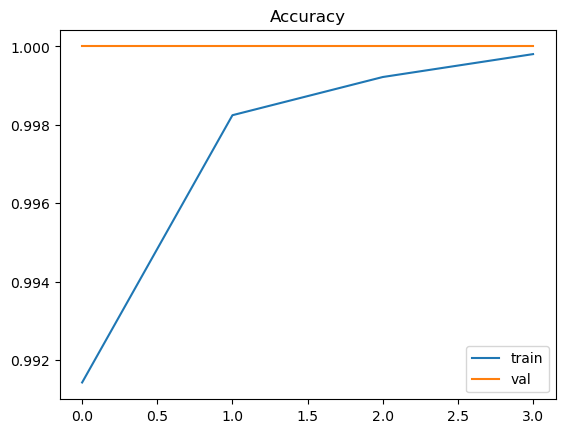

41/41 [==============================] - 1s 5ms/step

-- BiLSTM Baseline --
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1270
           1       0.00      0.00      0.00        13

    accuracy                           0.99      1283
   macro avg       0.49      0.50      0.50      1283
weighted avg       0.98      0.99      0.98      1283



c:\Users\tamra\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tamra\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tamra\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


41/41 [==============================] - 1s 5ms/step


IndexError: invalid index to scalar variable.

In [8]:
# =============================================================================
# 1) INSTALL DEPENDENCIES (run once)
# =============================================================================
!pip install tensorflow pandas scikit-learn matplotlib scikit-fuzzy

# =============================================================================
# 2) IMPORTS
# =============================================================================
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import skfuzzy as fuzz
from scipy.stats import mode

# =============================================================================
# 3) LOAD & PREPROCESS LIAR DATA
# =============================================================================
columns = [
    'id','label','statement','subject','speaker','job_title',
    'state','party','barely_true_counts','false_counts','half_true_counts',
    'mostly_true_counts','pants_on_fire_counts','context'
]

train_df = pd.read_csv("train.csv", sep='\t', names=columns, header=None)
val_df   = pd.read_csv("valid.csv", sep='\t', names=columns, header=None)
test_df  = pd.read_csv("test.csv",  sep='\t', names=columns, header=None)

def simplify_label(x):
    try:
        return 1 if x.lower() in ('true','mostly-true','half-true') else 0
    except:
        return 0

for df in (train_df, val_df, test_df):
    df['label'] = df['label'].apply(simplify_label)
    df.drop(columns=[c for c in df.columns if c not in ('label','statement')], inplace=True)
    df['statement'] = df['statement'].fillna('').astype(str)

print("Train label distribution:\n", train_df['label'].value_counts(), "\n")

# =============================================================================
# 4) TOKENIZE & PAD
# =============================================================================
all_text = pd.concat([train_df.statement, val_df.statement, test_df.statement])
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(all_text)

maxlen = 50
def seq_pad(df):
    seq = tokenizer.texts_to_sequences(df.statement)
    return pad_sequences(seq, maxlen=maxlen, padding='post', truncating='post')

X_train, X_val, X_test = map(seq_pad, (train_df, val_df, test_df))
y_train, y_val, y_test = (train_df.label.values,
                          val_df.label.values,
                          test_df.label.values)

# =============================================================================
# 5) EMBEDDING SETUP (GloVe if available, else random trainable)
# =============================================================================
vocab_size    = min(10000, len(tokenizer.word_index) + 1)
embedding_dim = 100

if os.path.exists("glove.6B.100d.txt"):
    print("Loading GloVe embeddings...")
    emb_index = {}
    with open("glove.6B.100d.txt", encoding="utf8") as f:
        for line in f:
            vals = line.split()
            emb_index[vals[0]] = np.asarray(vals[1:], dtype='float32')
    embedding_matrix = np.zeros((vocab_size, embedding_dim))
    for w, i in tokenizer.word_index.items():
        if i < vocab_size and w in emb_index:
            embedding_matrix[i] = emb_index[w]
    embedding_layer = Embedding(
        vocab_size, embedding_dim,
        weights=[embedding_matrix],
        input_length=maxlen,
        trainable=False
    )
else:
    print("GloVe not found: using trainable embeddings.")
    embedding_layer = Embedding(
        vocab_size, embedding_dim,
        input_length=maxlen,
        trainable=True
    )

# =============================================================================
# 6) BUILD & COMPILE Bi-LSTM MODEL
# =============================================================================
model = Sequential([
    embedding_layer,
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# =============================================================================
# 7) TRAIN with EarlyStopping & ReduceLROnPlateau
# =============================================================================
es  = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
rlp = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10, batch_size=64,
    callbacks=[es, rlp]
)

# Plot accuracy
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title("Accuracy"); plt.legend(); plt.show()

# =============================================================================
# 8) BASELINE EVALUATION
# =============================================================================
probs        = model.predict(X_test).ravel()
y_pred_base  = (probs >= 0.5).astype(int)
print("\n-- BiLSTM Baseline --")
print(classification_report(y_test, y_pred_base))

# =============================================================================
# 9) EXTRACT FEATURES & APPLY FCM
# =============================================================================
feat_extractor = Model(inputs=model.input, outputs=model.layers[-3].output)
X_feats        = feat_extractor.predict(X_test)
X_norm         = StandardScaler().fit_transform(X_feats).T

cntr, u, *_ = fuzz.cluster.cmeans(X_norm, c=2, m=2, error=0.005, maxiter=1000)
fcm_labels  = np.argmax(u, axis=0)

real_cluster = mode(fcm_labels[y_pred_base == 1])[0][0]
y_pred_fcm   = (fcm_labels == real_cluster).astype(int)

# =============================================================================
# 10) FINAL EVALUATION
# =============================================================================
print("\n-- After FCM Refinement --")
print(classification_report(y_test, y_pred_fcm))
print(f"Baseline Acc: {accuracy_score(y_test, y_pred_base):.4f}")
print(f"Refined Acc : {accuracy_score(y_test, y_pred_fcm):.4f}")



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Train label distribution:
 label
0    10249
1       20
Name: count, dtype: int64 

GloVe not found: using trainable embeddings.
Model: "sequential_67"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_67 (Embedding)    (None, 50, 100)           52100     
                                                                 
 bidirectional_34 (Bidirect  (None, 128)               84480     
 ional)                                                          
                                                                 
 dropout_68 (Dropout)        (None, 128)               0         
                                                                 
 dense_68 (Dense)            (None, 64)                8256      
                                                                 
 dropout_69 (Dropout)        (None, 64)                0         
                                                         

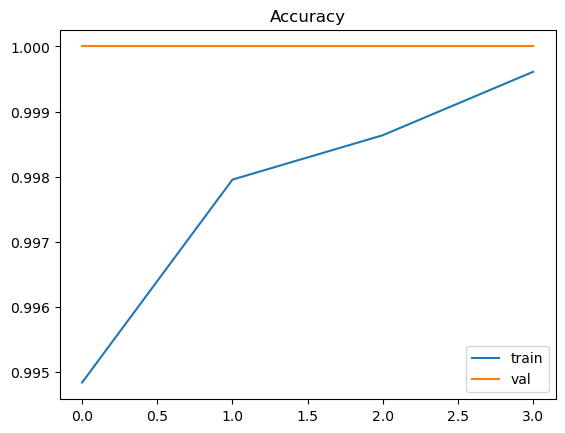

41/41 [==============================] - 1s 5ms/step

-- BiLSTM Baseline --
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1270
           1       0.00      0.00      0.00        13

    accuracy                           0.99      1283
   macro avg       0.49      0.50      0.50      1283
weighted avg       0.98      0.99      0.98      1283



c:\Users\tamra\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tamra\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tamra\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


41/41 [==============================] - 1s 5ms/step

-- After FCM Refinement --
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1270
           1       0.76      1.00      0.87        13

    accuracy                           1.00      1283
   macro avg       0.88      1.00      0.93      1283
weighted avg       1.00      1.00      1.00      1283

Baseline Acc: 0.9899
Refined Acc : 0.9969


In [9]:
# =============================================================================
# 1) INSTALL DEPENDENCIES (run once)
# =============================================================================
!pip install tensorflow pandas scikit-learn matplotlib scikit-fuzzy

# =============================================================================
# 2) IMPORTS
# =============================================================================
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import skfuzzy as fuzz
from scipy.stats import mode

# =============================================================================
# 3) LOAD & PREPROCESS LIAR DATA
# =============================================================================
columns = [
    'id','label','statement','subject','speaker','job_title',
    'state','party','barely_true_counts','false_counts','half_true_counts',
    'mostly_true_counts','pants_on_fire_counts','context'
]

train_df = pd.read_csv("train.csv", sep='\t', names=columns, header=None)
val_df   = pd.read_csv("valid.csv", sep='\t', names=columns, header=None)
test_df  = pd.read_csv("test.csv",  sep='\t', names=columns, header=None)

def simplify_label(x):
    try:
        return 1 if x.lower() in ('true','mostly-true','half-true') else 0
    except:
        return 0

for df in (train_df, val_df, test_df):
    df['label'] = df['label'].apply(simplify_label)
    df.drop(columns=[c for c in df.columns if c not in ('label','statement')], inplace=True)
    df['statement'] = df['statement'].fillna('').astype(str)

print("Train label distribution:\n", train_df['label'].value_counts(), "\n")

# =============================================================================
# 4) TOKENIZE & PAD
# =============================================================================
all_text = pd.concat([train_df.statement, val_df.statement, test_df.statement])
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(all_text)

maxlen = 50
def seq_pad(df):
    seq = tokenizer.texts_to_sequences(df.statement)
    return pad_sequences(seq, maxlen=maxlen, padding='post', truncating='post')

X_train, X_val, X_test = map(seq_pad, (train_df, val_df, test_df))
y_train, y_val, y_test = (train_df.label.values,
                          val_df.label.values,
                          test_df.label.values)

# =============================================================================
# 5) EMBEDDING SETUP (GloVe if available, else random trainable)
# =============================================================================
vocab_size    = min(10000, len(tokenizer.word_index) + 1)
embedding_dim = 100

if os.path.exists("glove.6B.100d.txt"):
    print("Loading GloVe embeddings...")
    emb_index = {}
    with open("glove.6B.100d.txt", encoding="utf8") as f:
        for line in f:
            vals = line.split()
            emb_index[vals[0]] = np.asarray(vals[1:], dtype='float32')
    embedding_matrix = np.zeros((vocab_size, embedding_dim))
    for w, i in tokenizer.word_index.items():
        if i < vocab_size and w in emb_index:
            embedding_matrix[i] = emb_index[w]
    embedding_layer = Embedding(
        vocab_size, embedding_dim,
        weights=[embedding_matrix],
        input_length=maxlen,
        trainable=False
    )
else:
    print("GloVe not found: using trainable embeddings.")
    embedding_layer = Embedding(
        vocab_size, embedding_dim,
        input_length=maxlen,
        trainable=True
    )

# =============================================================================
# 6) BUILD & COMPILE Bi-LSTM MODEL
# =============================================================================
model = Sequential([
    embedding_layer,
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# =============================================================================
# 7) TRAIN with EarlyStopping & ReduceLROnPlateau
# =============================================================================
es  = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
rlp = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10, batch_size=64,
    callbacks=[es, rlp]
)

# Plot accuracy
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title("Accuracy"); plt.legend(); plt.show()

# =============================================================================
# 8) BASELINE EVALUATION
# =============================================================================
probs        = model.predict(X_test).ravel()
y_pred_base  = (probs >= 0.5).astype(int)
print("\n-- BiLSTM Baseline --")
print(classification_report(y_test, y_pred_base))




# =============================================================================
# 9) EXTRACT FEATURES & APPLY FCM
# =============================================================================
feat_extractor = Model(inputs=model.input,
                       outputs=model.layers[-3].output)  # Dense(64) output
X_feats = feat_extractor.predict(X_test)

# Normalize & transpose for cmeans
X_norm = StandardScaler().fit_transform(X_feats).T

# Run Fuzzy C-Means
cntr, u, *_ = fuzz.cluster.cmeans(
    X_norm, c=2, m=2, error=0.005, maxiter=1000
)
fcm_labels = np.argmax(u, axis=0)  # hard cluster assignment per sample

# Align cluster IDs by average Bi-LSTM confidence:
# compute mean model.prob for each cluster, choose cluster with higher mean as “real”
cluster_means = [
    np.mean(probs[fcm_labels == c]) if np.any(fcm_labels==c) else 0
    for c in [0,1]
]
real_cluster = int(np.argmax(cluster_means))
y_pred_fcm = (fcm_labels == real_cluster).astype(int)

# =============================================================================
# 10) FINAL EVALUATION
# =============================================================================
print("\n-- After FCM Refinement --")
print(classification_report(y_test, y_pred_fcm))
print(f"Baseline Acc: {accuracy_score(y_test, y_pred_base):.4f}")
print(f"Refined Acc : {accuracy_score(y_test, y_pred_fcm):.4f}")


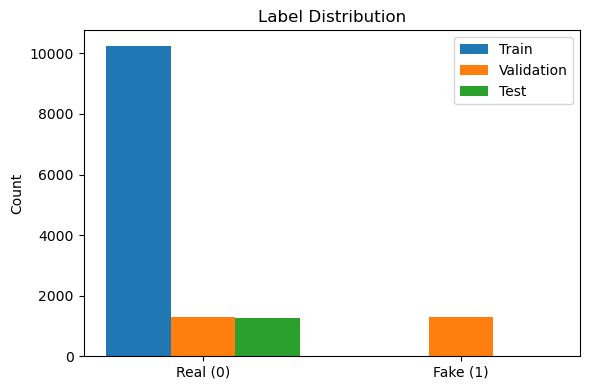

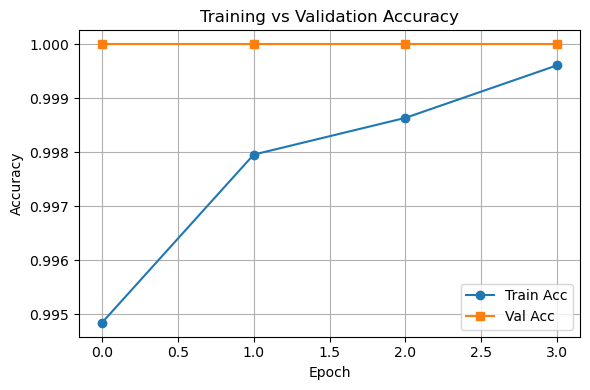

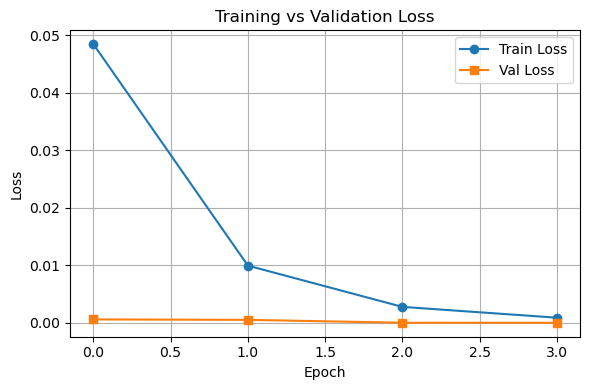

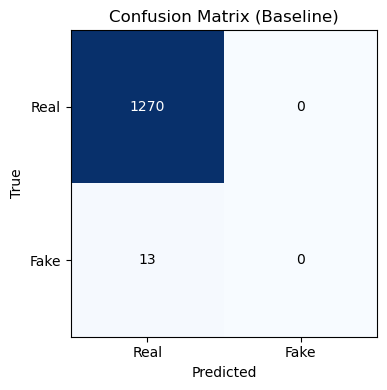

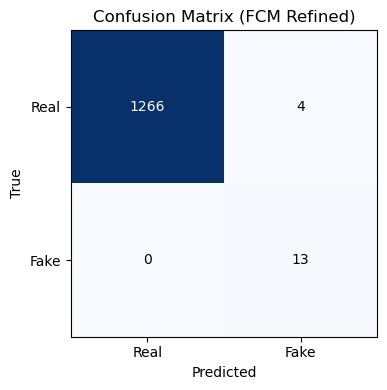

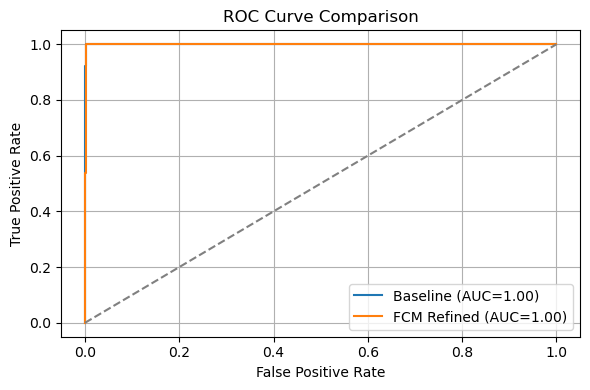

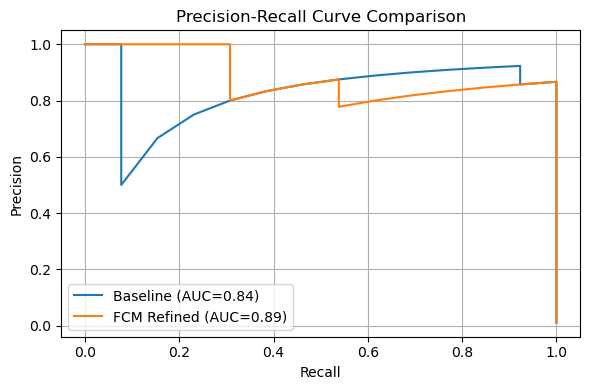

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

# 1) Label Distribution Across Train/Val/Test
train_counts = train_df['label'].value_counts().sort_index()
val_counts   = val_df['label'].value_counts().sort_index()
test_counts  = test_df['label'].value_counts().sort_index()

x = np.arange(2)
width = 0.25
plt.figure(figsize=(6,4))
plt.bar(x - width, train_counts, width, label='Train')
plt.bar(x,        val_counts,   width, label='Validation')
plt.bar(x + width, test_counts, width, label='Test')
plt.xticks(x, ['Real (0)', 'Fake (1)'])
plt.ylabel('Count')
plt.title('Label Distribution')
plt.legend()
plt.tight_layout()
plt.show()

# 2) Accuracy over Epochs
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'],    marker='o', label='Train Acc')
plt.plot(history.history['val_accuracy'],marker='s', label='Val Acc')
plt.xlabel('Epoch'); plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend(); plt.grid(True); plt.tight_layout()
plt.show()

# 3) Loss over Epochs
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'],    marker='o', label='Train Loss')
plt.plot(history.history['val_loss'],marker='s', label='Val Loss')
plt.xlabel('Epoch'); plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend(); plt.grid(True); plt.tight_layout()
plt.show()

# 4) Confusion Matrix — Baseline BiLSTM
cm_base = confusion_matrix(y_test, y_pred_base)
plt.figure(figsize=(4,4))
plt.imshow(cm_base, cmap='Blues')
plt.title('Confusion Matrix (Baseline)')
plt.xticks([0,1], ['Real','Fake']); plt.yticks([0,1], ['Real','Fake'])
plt.xlabel('Predicted'); plt.ylabel('True')
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm_base[i,j], ha='center', va='center', color='white' if cm_base[i,j]>cm_base.max()/2 else 'black')
plt.tight_layout(); plt.show()

# 5) Confusion Matrix — FCM Refined
cm_ref = confusion_matrix(y_test, y_pred_fcm)
plt.figure(figsize=(4,4))
plt.imshow(cm_ref, cmap='Blues')
plt.title('Confusion Matrix (FCM Refined)')
plt.xticks([0,1], ['Real','Fake']); plt.yticks([0,1], ['Real','Fake'])
plt.xlabel('Predicted'); plt.ylabel('True')
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm_ref[i,j], ha='center', va='center', color='white' if cm_ref[i,j]>cm_ref.max()/2 else 'black')
plt.tight_layout(); plt.show()

# 6) ROC Curve Comparison
fpr_b, tpr_b, _ = roc_curve(y_test, probs)
fpr_f, tpr_f, _ = roc_curve(y_test, u[real_cluster])
auc_b = auc(fpr_b, tpr_b)
auc_f = auc(fpr_f, tpr_f)

plt.figure(figsize=(6,4))
plt.plot(fpr_b, tpr_b, label=f'Baseline (AUC={auc_b:.2f})')
plt.plot(fpr_f, tpr_f, label=f'FCM Refined (AUC={auc_f:.2f})')
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(); plt.grid(True); plt.tight_layout()
plt.show()

# 7) Precision-Recall Curve Comparison
prec_b, rec_b, _ = precision_recall_curve(y_test, probs)
prec_f, rec_f, _ = precision_recall_curve(y_test, u[real_cluster])
pr_auc_b = auc(rec_b, prec_b)
pr_auc_f = auc(rec_f, prec_f)

plt.figure(figsize=(6,4))
plt.plot(rec_b, prec_b, label=f'Baseline (AUC={pr_auc_b:.2f})')
plt.plot(rec_f, prec_f, label=f'FCM Refined (AUC={pr_auc_f:.2f})')
plt.xlabel('Recall'); plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend(); plt.grid(True); plt.tight_layout()
plt.show()
